# a)

Anthony Niznik

In [106]:
using PyPlot

Suppose we have a sinusoid function

In [107]:
f(x) = 10*sin(x)

f (generic function with 1 method)

Our dataset $\mathcal D$ will consist of seven datapoints drawn from the following probabilistic model. 

For each datapoint we randomly draw $x_i$ uniformly in [0,6] and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution.

In [108]:
srand(44)
n = 7
D = Array{Float64}(n, 2)
X = [randn(n, 1) ones(n)]
Y = Array{Float64}(n, 1)
for i = 1:n
    g = randn()    
    q = rand()*6
    Y[i] = 10*sin(q) + g
    D[i,2] = Y[i]
    D[i,1] = q
    X[i,1] = q
end
D

7x2 Array{Float64,2}:
 5.34167   -8.53785
 3.81262   -4.67206
 3.16322   -1.04431
 3.38387   -4.31413
 0.946711   7.99014
 4.28157   -8.01869
 5.21144   -8.85085

Plot the dataset $\mathcal D$ and the true function $f(x)$.

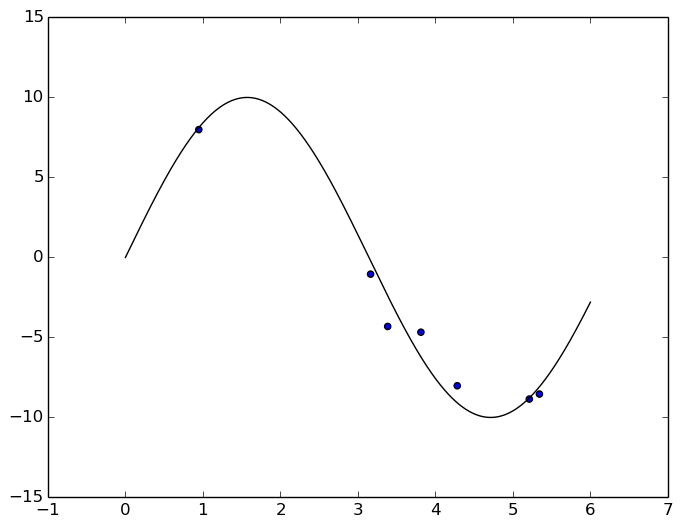

PyObject <matplotlib.collections.PathCollection object at 0x7f8333bcf310>

In [109]:
"""plot function y=f(x)"""
function plotfunc(f;
    xmin=0,xmax=6,nsamples=1000)
    xsamples = linspace(xmin,xmax,nsamples)
    plot(xsamples, [f(x) for x in xsamples], color="black")
end
plotfunc(f)
scatter(D[:,1],D[:,2])

# b)

Fit a linear model to $\mathcal D$

In [110]:

w₁ = X\Y

w₁
Z = *(X,w₁)
X
w₁

2x1 Array{Float64,2}:
 -3.89087
 10.6091 

Plot the linear model $l(x)$ together with $\mathcal D$ and $f(x)$. Feel free to use our method $\verb|plotfunc(f)|$.

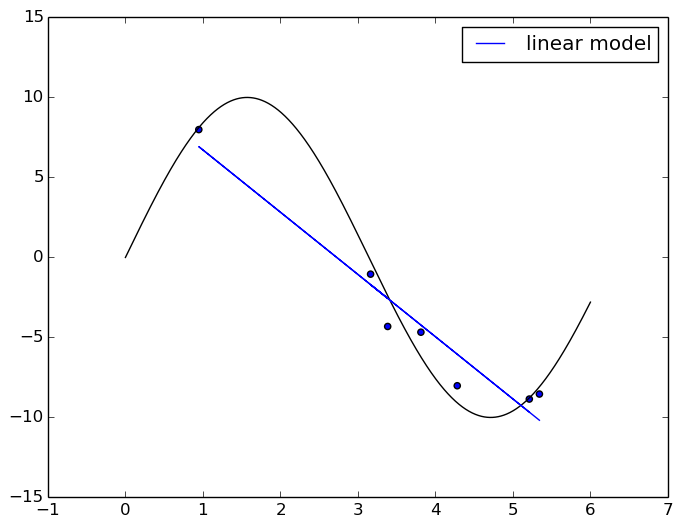

PyObject <matplotlib.legend.Legend object at 0x7f83339e1410>

In [112]:
plotfunc(f)
scatter(D[:,1],D[:,2])
plot(X[:,1],Z[:], label="linear model")
legend()

# c)

Fit a cubic model $c(x)$ to $\mathcal D$

In [113]:
max_order = 2

X2 = [randn(n, 3) ones(n)] 
X2[:,1]=X[:,1]

for k=1:max_order
    X2[:,k+1] = X2[:,1].^(k+1)
end

D
X2

w₂ = X2\Y
Z = *(X2,w₂)
Z
X2

7x4 Array{Float64,2}:
 5.34167   28.5335    152.416     1.0
 3.81262   14.536      55.4203    1.0
 3.16322   10.006      31.6511    1.0
 3.38387   11.4506     38.7474    1.0
 0.946711   0.896262    0.848501  1.0
 4.28157   18.3318     78.489     1.0
 5.21144   27.1591    141.538     1.0

In [114]:
#For Plotting

n = 1000
Dp = Array{Float64}(n, 2)
Xp = [linspace(0,6,1000) ones(n)]
Yp = Array{Float64}(n, 1)

max_order = 2

Xpp = [randn(n, 3) ones(n)] 
Xpp[:,1]=Xp[:,1]

for k=1:max_order
    Xpp[:,k+1] = Xpp[:,1].^(k+1)
end


Zp = *(Xpp,w₂)

1000x1 Array{Float64,2}:
  4.18907
  4.23794
  4.28645
  4.33462
  4.38243
  4.42989
  4.477  
  4.52376
  4.57018
  4.61624
  4.66196
  4.70733
  4.75236
  ⋮      
 -5.49556
 -5.44821
 -5.40052
 -5.35247
 -5.30407
 -5.25532
 -5.20622
 -5.15676
 -5.10695
 -5.05678
 -5.00626
 -4.95537

Plot the cubic model with $\mathcal D$ and $f(x)$

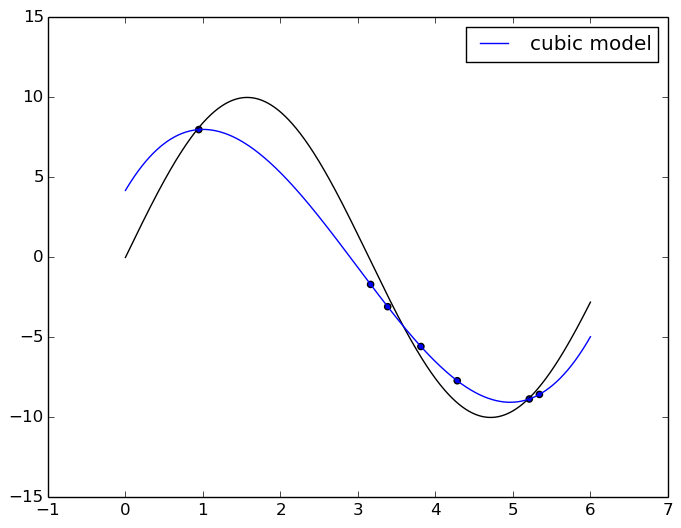

PyObject <matplotlib.legend.Legend object at 0x7f8333932250>

In [115]:
plotfunc(f)
scatter(X2[:,1],Z[:])
plot(Xpp[:,1],Zp[:], label="cubic model")
legend()

# d)

Repat the parts (b) and (c) for 1000 different sets $\mathcal D$. Compute $\bar{l}$ and $\bar{c}$, the average linear and average cubic models.

In [116]:

a=1000
l = Array{Float64}(a,2)
l_avg = Array{Float64}(2, 1)

for k = 1:a
    
n = 7
D = Array{Float64}(n, 2)
X = [randn(n, 1) ones(n)]
Y = Array{Float64}(n, 1)
    
for i = 1:n
    g = randn()    
    q = rand()*6
    Y[i] = 10*sin(q) + g
    D[i,2] = Y[i]
    D[i,1] = q
    X[i,1] = q
end


    w₃ = X\Y
    l[k,1] = w₃[1]
    l[k,2] = w₃[2]
    
end


l_avg[1] = mean(l[:,1])
l_avg[2] = mean(l[:,2])
Z_avg = *(Xp, l_avg)
l_avg

2x1 Array{Float64,2}:
 -3.6569
 11.3031

In [117]:

a=1000
cubic = Array{Float64}(a,4)
l_avg2 = Array{Float64}(4, 1)
max_order = 2

for k = 1:a
n = 7 
D = Array{Float64}(n, 2)
X3 = [randn(n, 3) ones(n)]
Y = Array{Float64}(n, 1)
    
for i = 1:n
    g = randn()    
    q = rand()*6
    Y[i] = 10*sin(q) + g
    D[i,2] = Y[i]
    D[i,1] = q
    X3[i,1] = q
end
    
         for j=1:max_order
            X3[:,j+1] = X3[:,1].^(j+1)
         end
    
      w₄ = X3\Y
    cubic[k,1] = w₄[1]
    cubic[k,2] = w₄[2]
    cubic[k,3] = w₄[3]
    cubic[k,4] = w₄[4]
        
end
l_avg2[1] = mean(cubic[:,1])
l_avg2[2] = mean(cubic[:,2])
l_avg2[3] = mean(cubic[:,3])
l_avg2[4] = mean(cubic[:,4])


Z_avg = *(Xp, l_avg)
Z_avg2 = *(Xpp, l_avg2)
l_avg2

4x1 Array{Float64,2}:
 21.4162 
 -9.72712
  1.03648
 -3.29758

Plot $\bar{l}$ together with $f(x)$.

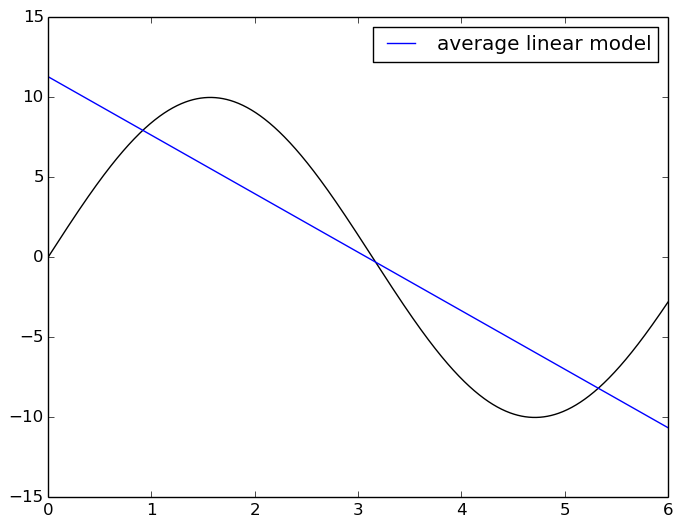

PyObject <matplotlib.legend.Legend object at 0x7f8333860950>

In [118]:
plotfunc(f)
plot(Xp[:,1],Z_avg[:], label="average linear model")
legend()

Plot $\bar{c}(x)$ together with $f(x)$.

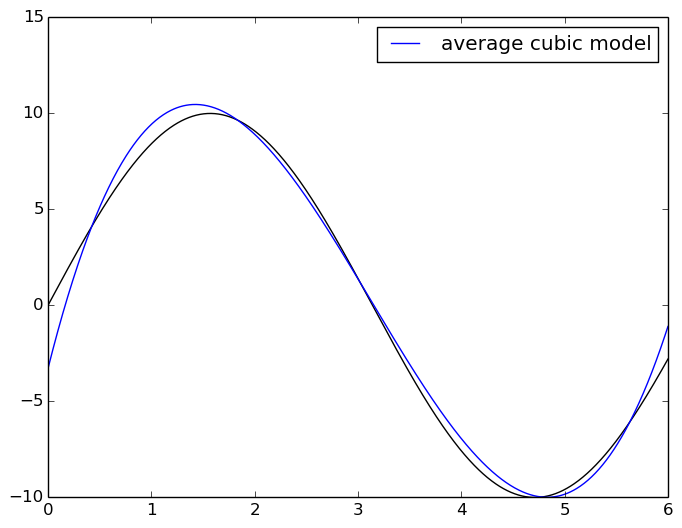

PyObject <matplotlib.legend.Legend object at 0x7f833379fbd0>

In [119]:
plotfunc(f)
plot(Xpp[:,1],Z_avg2[:], label="average cubic model")
legend()

# e)

Compute the bias of $\bar{l}$. You can use our integrate function.

In [120]:
function integrate(f, a, b)
    n = 1000
    delta = (b - a)/n;		   ## nothing to change below here
    xs = a + (0:n-1) * delta;          ## n, right is 1:n * delta 
    fx = map(f, xs);               
    return sum(fx) * delta
end

integrate (generic function with 1 method)

In [121]:
function bias_lin(x)
    total_lin=0
    
total_lin = 0
total = 0  
    
for i=1:a
        
    total = 0
        total = (10*sin(x) - (x * l_avg[1] + l_avg[2]))^2
    total_lin = total + total_lin
    
end
    return total_lin/a
end
bias_linear = integrate(bias_lin, 0, 6) / 6


17.366733893223778

We can interpret the bias as how far off our averaged model is from the true function. One way to visually see this is by plotting $\bar{l}(x)$ with $f(x)$ and color in their difference. Try out the plotting function below.

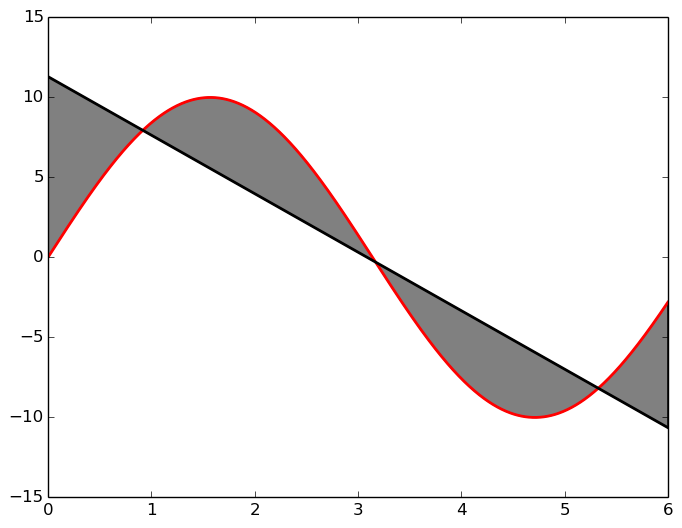

PyObject <matplotlib.collections.PolyCollection object at 0x7f833374de90>

In [122]:
x = [linspace(0,6,1000) ones(1000)]
y = f(x)
y_2 = *(x, l_avg)
plot(x[:,1], y[:,1], color="red", linewidth=2.0)
plot(x[:,1], y_2[:,1], color="black", linewidth=2.0)
fill_between(x[:,1], y_2[:,1], y[:,1], facecolor="grey", interpolate=true)

Compute the bias of the cubic model $\bar{c}(x)$.

In [123]:
function bias_cub(e)
    
total_cub = 0
total = 0    
    
for i=1:a
        
    total = 0
        total = (10*sin(e) - (e * l_avg2[1] + (e^2)*l_avg2[2] + (e^3)*l_avg2[3] + l_avg2[4]))^2
    total_cub = total + total_cub
    
end
    return total_cub/a
end
bias_cubic = integrate(bias_cub, 0, 6) / 6

0.45636612098267954

Which model has smaller bias?

The cubic model has a smaller squared bias.

# f)

Next compute the variance of the linear model.

In [124]:

function variance_lin(v)
    
tot_lin=0 
var = 0  
    
for i=1:a
   
    var = 0
        var = ( (v * l[a,1] + l[a,2]) - (v * l_avg[1] + l_avg[2]) )^2
    tot_lin = var + tot_lin
    
end
    return tot_lin/a
end
var_linear = integrate(variance_lin, 0, 6) / 6

1.6355121518746643

Compute the variance of the cubic model.

In [125]:
function variance_cubic(s)
    
tot_cubic=0 
var1 = 0  
    
for i=1:a
        
    var1 = 0
var1 = ((s * cubic[a,1] + (s^2)*cubic[a,2] + (s^3)*cubic[a,3] + cubic[a,4]) - (s * l_avg2[1] + (s^2)*l_avg2[2] + (s^3)*l_avg2[3] + l_avg2[4]))^2
    tot_cubic = var1 + tot_cubic
    
end
    return tot_cubic/a
end
var_cubic = integrate(variance_cubic, 0, 6) / 6

114.25189843641199

In [126]:
Error_lin = bias_linear + var_linear

19.002246045098442

In [127]:
Error_cub = bias_cubic + var_cubic

114.70826455739467

Which model had higher variance? How do you interpret this? Which model has smaller overall error?

The cubic model has higher variance. This means that the cubic model will vary a lot more in trying to capture the true model. This makes sense since the slope of a linear model will not change much with D having 7 data points. The linear model has smaller overall error because the variance of the cubic model is very high (though the error changes since X is randomly generated).

# g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model has smaller overall error?

When the number of data points is about 10 or greater, the cubic model will have overall smaller error. When there are about 9 or fewer data points, the linear model will have smaller error. 

# h)

Instead of sampling new data to compute the bias and variance of our model, we could use a bootstrap estimator to get more use out of the few data points we have. Try this for a few different data set sizes and report on your results. How big a data set is needed for the bootstrap to give a reliable estimate of the bias and variance?

In [128]:
srand(111)

Bias_Estimate_Bootstrap = Array{Float64}(94, 1)
Variance_Estimate_Bootstrap = Array{Float64}(94, 1)

for n = 7:100
K = 1000
mysample = 0

x = Array{Float64}(n, 2)
x[:,2] = ones(n)
y = Array{Float64}(n, 1)

for i = 1:n
    g = randn()    
    q = rand()*6
    y[i] = 10*sin(q) + g
    x[i,1] = q
end

models = zeros(K,2)
for k=1:K
    mysample = rand(1:n,n)
    xk,yk = x[mysample], y[mysample]
    Xk = [xk ones(n)]
    wk = Xk \ yk
    models[k,:] = wk
end
boot_avg = Array{Float64}(2, 1)
boot_avg[1] = mean(models[:,1])
boot_avg[2] = mean(models[:,2])   
    
    function bias_lin2(x)

total_lin = 0
total = 0  
    
for i=1:K
        
    total = 0
        total = (10*sin(x) - (x * boot_avg[1] + boot_avg[2]))^2
    total_lin = total + total_lin
    
end
    return total_lin/K
end
    
bias_linear2 = integrate(bias_lin2, 0, 6) / 6
        
    Bias_Estimate_Bootstrap[n-6] = bias_linear2
    
    
end

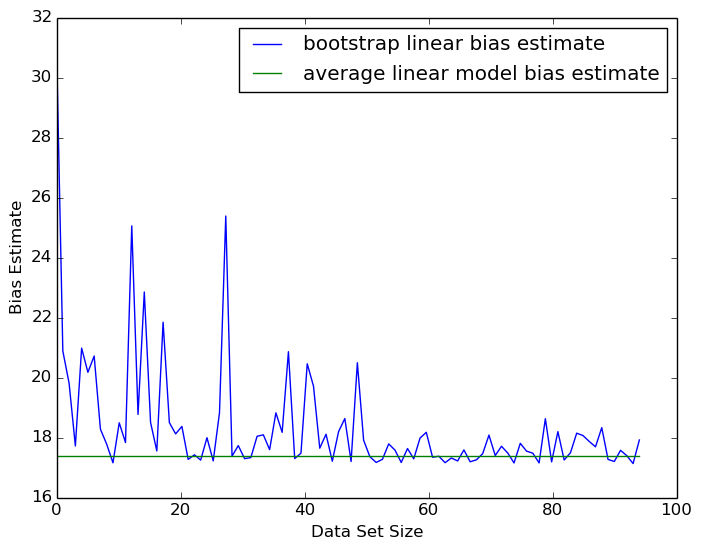

PyObject <matplotlib.legend.Legend object at 0x7f8333692810>

In [129]:
#Calculate linear bias (y) based on number of data points (x) assuming constant 1000 resamples (bootstrap)
y = [ones(94)]
for i = 1:94
    y[i] = bias_linear
end

X_Boot = [linspace(0,94,94) ones(94)]

plot(X_Boot[:,1],Bias_Estimate_Bootstrap[:], label="bootstrap linear bias estimate")
plot(X_Boot[:,1], y[:], label="average linear model bias estimate")
xlabel("Data Set Size"), ylabel("Bias Estimate")
legend()


In order for the bootstrap to have a reliable estimate of bias and variance when resampling for 1000 times, you would need a data set of about 50 data points or more. When increasing the number of resamplings, the estimate of bias and variance becomes more accurate. When increasing the number of data points, the estimate of bias and variance becomes more accurate as well.